# CNN with MNIST DATASET

### Import Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


### Making Test,Validate and Train Sets

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(0.2), random_state=42)

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)


(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,) (10000, 28, 28, 1) (10000,)


### Model Parameters

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1,(3, 3), activation=None, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model and Loss and Accuracy Graphs

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'],label="loss")
    plt.plot(history.history['val_loss'],label="val_loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("SCC")
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label="accuracy")
    plt.plot(history.history['val_accuracy'],label="val_accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

In [6]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=0)

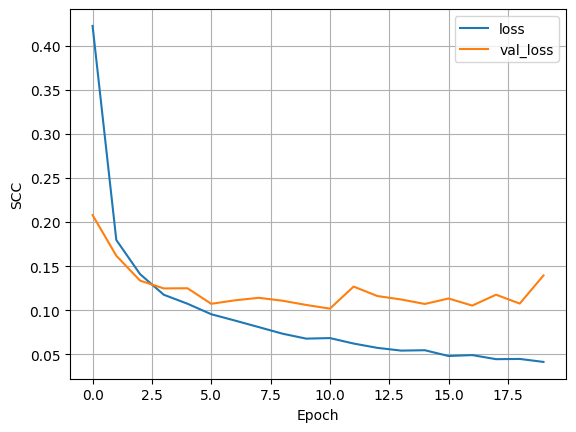

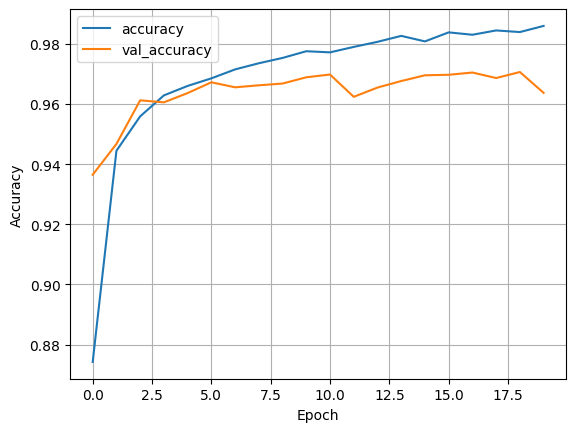

In [7]:
plot_loss(history)
plot_accuracy(history)

### Report Section

In [8]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred.argmax(axis=1)))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.99      0.93      0.96       982
           5       0.96      0.97      0.96       892
           6       0.97      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.91      0.98      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 169)               0         
                                                                 
 dense (Dense)               (None, 64)                10880     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

### Checking what it got wrong

In [10]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i].argmax():
        #plt.imshow(x_test[i].reshape(28, 28))
        #plt.title(f"True: {y_test[i]}, Predict: {y_pred[i].argmax()}")
        #plt.show()
        count+=1
print(count, "wrong predictions")
print("Total test samples: ", len(y_test))



342 wrong predictions
Total test samples:  10000


### Save Model & Summary

In [ ]:
model.save("model.keras")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 169)               0         
                                                                 
 dense (Dense)               (None, 64)                10880     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

### Custom Tests using the model

1/1 [==============================] - 0s 12ms/step
The predicted class is: 1


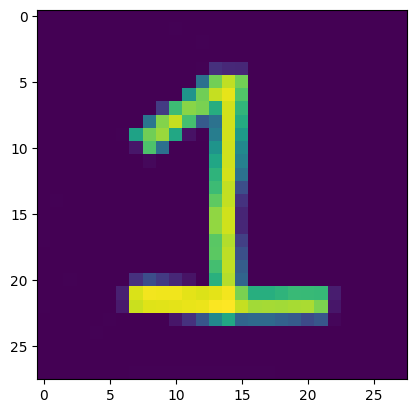

In [17]:
from PIL import Image
image = Image.open('number_3.jpeg').convert('L')
image = image.resize((28, 28))

image_array = np.array(image)

image_array = image_array / 255.0

image_array = image_array.reshape(1, 28, 28, 1)

prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)

print(f'The predicted class is: {predicted_class}')

plt.imshow(image_array.reshape(28, 28))
plt.show()

### Export Weights and Biases

In [13]:
for layer in model.layers:
        if layer.get_weights() != []:
            np.savetxt("Weights_Biases/"+layer.name + ".csv", layer.get_weights()[0].flatten(), delimiter=",")
            np.savetxt("Weights_Biases/"+layer.name + "_bias.csv", layer.get_weights()[1].flatten(), delimiter=",")

      

In [14]:
def float_to_fixed_point(value, integer_bits=2, fractional_bits=14):
    scale_factor = 2 ** fractional_bits
    max_value = (2 ** (integer_bits + fractional_bits - 1)) - 1
    min_value = -(2 ** (integer_bits + fractional_bits - 1))
    
    fixed_point_value = int(round(value * scale_factor))
    if fixed_point_value > max_value:
        fixed_point_value = max_value
    elif fixed_point_value < min_value:
        fixed_point_value = min_value
    
    return fixed_point_value

def save_fixed_point_binary(values, filename):
    with open(filename, 'w') as f:
        for value in values:
            fixed_point_value = float_to_fixed_point(value)
            binary_value = format(fixed_point_value & 0xFFFF, '016b')
            f.write(binary_value + '\n')


for layer in model.layers:
    if layer.get_weights() != []:
        weights, biases = layer.get_weights()
        
        weights_filename = f"Bin_Float_WB/{layer.name}_weights.bin"
        biases_filename = f"Bin_Float_WB/{layer.name}_biases.bin"
        
        save_fixed_point_binary(weights.flatten(), weights_filename)
        save_fixed_point_binary(biases.flatten(), biases_filename)

### To generate ZyNet Structure for just the NN part of CNN


In [15]:
weights = []
biases = []

for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
         continue
    if len(layer.get_weights()) == 2:
        w, b = layer.get_weights()
        
        # Organize weights: weights[layer][neuron][weights]
        layer_weights = [list(neuron_weights) for neuron_weights in w.T]  # Transpose for neuron-major ordering
        weights.append(layer_weights)
        
        # Organize biases: biases[layer][neuron][bias]
        layer_biases = [[bias_val] for bias_val in b]
        biases.append(layer_biases)

with open("weightsandbiaseszynet.txt",'w') as f:
    f.write('{"weights": ')
    f.write(str(weights))
    f.write(', "biases": ')
    f.write(str(biases))
    f.write('}')